In [81]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics import gofplots
import pylab


In [ ]:
def build_residual_qq

**Solution 2**

**(a)**

In [6]:
solution_data = pd.read_csv("data/Solution Concentration.csv")
lm_soln = ols("Y~X", data=solution_data).fit()
lm_soln.summary()

C:\Users\A0687514\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     55.99
Date:                Tue, 15 Oct 2019   Prob (F-statistic):           4.61e-06
Time:                        12:01:24   Log-Likelihood:                -9.0225
No. Observations:                  15   AIC:                             22.05
Df Residuals:                      13   BIC:                             23.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5753      0.249     10.354      0.000       2.038       3.113
X             -0.3240      0.043     -7.483      0.000      -0.418      -0.230
==============================================================================
Omnibus:                        2.990   Durbin-Watson:                   0.717
Prob(Omnibus):                  0.224   Jarque-Bera (JB):                1.428
Skew:                           0.412   Prob(JB):                        0.490
Kurtosis:                       1.733   Cond. No.                         11.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
lm_soln.summary2()

C:\Users\A0687514\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.797   
Dependent Variable: Y                AIC:                22.0450 
Date:               2019-10-15 12:02 BIC:                23.4611 
No. Observations:   15               Log-Likelihood:     -9.0225 
Df Model:           1                F-statistic:        55.99   
Df Residuals:       13               Prob (F-statistic): 4.61e-06
R-squared:          0.812            Scale:              0.22497 
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept      2.5753    0.2487  10.3538  0.0000   2.0380   3.1127
X             -0.3240    0.0433  -7.4829  0.0000  -0.4175  -0.2305
-----------------------------------------------------------------
Omnibus:              2.990        Durbin-Watson:           0.717
Prob(Omnibus):        0.224        Jarque-Bera (JB):        1.428
Skew:                 0.412        Prob(JB):                0.490
Kurtosis:             1.733        Condition No.:           12   
=================================================================

"""

**scipy.stats.probplot:**
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html

*See also:*
**qqplot:** https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html

Text(0.5, 1.0, 'Fitted Values vs. Residuals')

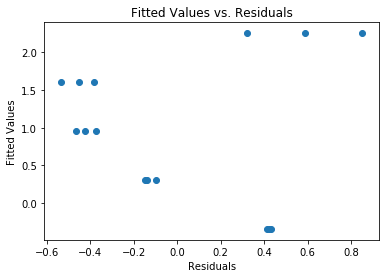

In [28]:
plt.scatter(lm_soln.resid, lm_soln.fittedvalues)
plt.xlabel("Residuals")
plt.ylabel("Fitted Values")
plt.title("Fitted Values vs. Residuals")

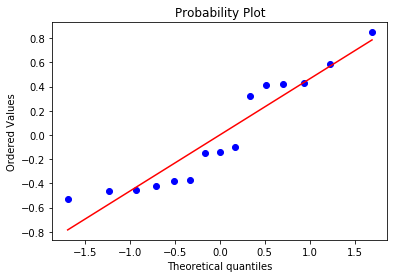

In [29]:
stats.probplot(lm_soln.resid, dist="norm", plot=pylab)
pylab.show()

*Interpretation:*

*Fitted vs. Residual Plot:* The residuals are not equally spread and have a clear distinct pattern. Thus, we can say that, the error term does not have constant variance.

*Normal Probability Plot:* The plot seems to be non-linear, which means that the error is not in agreement with the normality. 

**(b)**

Text(0.5, 1.0, 'Scatter Plot')

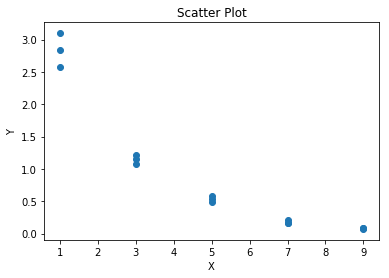

In [33]:
plt.scatter(solution_data["X"], solution_data["Y"])
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter Plot")

*Interpretation:*

Since the value of Y seems to be decreasing with the value of X and then smoothing out eventually, it seems like a logarithmic or exponential function. Thus I would like to try to transform Y to log(Y).

**(c)**

Box-Cox Transformation:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox_llf.html#scipy.stats.boxcox_llf

In [46]:
y = solution_data["Y"]
lmbdas = np.array([-.2,-.1,0, .1, .2])
llf = np.zeros(lmbdas.shape, dtype=float)
for ii, lmbda in enumerate(lmbdas):
    llf[ii] = stats.boxcox_llf(lmbda, y)

In [47]:
y_most_normal, lmbda_optimal = stats.boxcox(y)

Text(0, 0.5, 'Box-Cox log-likelihood')

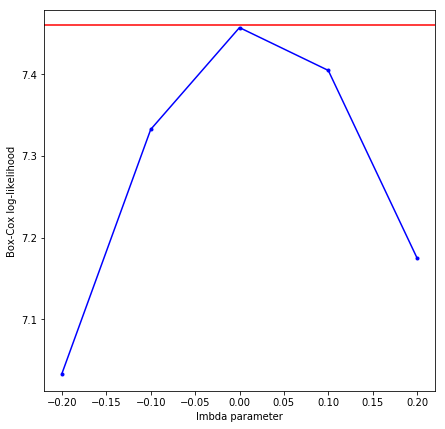

In [51]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
ax.plot(lmbdas, llf, 'b.-')
ax.axhline(stats.boxcox_llf(lmbda_optimal, y), color='r')
ax.set_xlabel('lmbda parameter')
ax.set_ylabel('Box-Cox log-likelihood')

*Interpretation:*

The suggested Y transformation with Box-Cox method is: $\lambda \approx 0$. Thus, we'll assume the suggested $\lambda = 0$, which implies the suggested transformation is: $Y' = log(Y)$.

**(d)**

In [52]:
Y1 = np.log(solution_data["Y"])
solution_data["Y1"] = Y1

In [54]:
lm_soln_t = ols("Y1~X", data=solution_data).fit()
lm_soln_t.summary2()

C:\Users\A0687514\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.992   
Dependent Variable: Y1               AIC:                -20.4745
Date:               2019-10-15 13:14 BIC:                -19.0584
No. Observations:   15               Log-Likelihood:     12.237  
Df Model:           1                F-statistic:        1838.   
Df Residuals:       13               Prob (F-statistic): 2.19e-15
R-squared:          0.993            Scale:              0.013215
------------------------------------------------------------------
              Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     1.5079    0.0603   25.0137  0.0000   1.3777   1.6382
X            -0.4499    0.0105  -42.8745  0.0000  -0.4726  -0.4273
-----------------------------------------------------------------
Omnibus:               0.502        Durbin-Watson:          1.580
Prob(Omnibus):         0.778        Jarque-Bera (JB):       0.542
Skew:                  -0.043       Prob(JB):               0.763
Kurtosis:              2.073        Condition No.:          12   
=================================================================

"""

The regression function with *transformed data*: $Y' = 1.50792 - 0.44993*X $

Text(0.5, 1.0, 'Fitted Regression Line on Transformed Data')

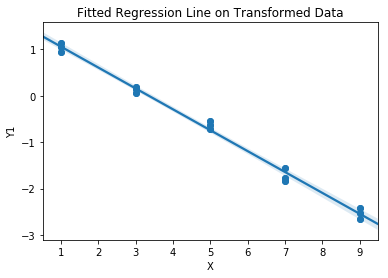

In [57]:
plt.scatter(solution_data["X"], solution_data["Y1"])
plt.xlabel("X")
plt.ylabel("$log(Y)$")
sns.regplot(solution_data["X"], solution_data["Y1"])
plt.title("Fitted Regression Line on Transformed Data")

*Interpretation:*

Based on the scatter plot, the regression line appears to be a good fit on transformed data. Looking at the summary, we can also see that the $R^{2} = 0.993$.

**(f)**

Text(0.5, 1.0, 'Fitted Values vs. Residuals')

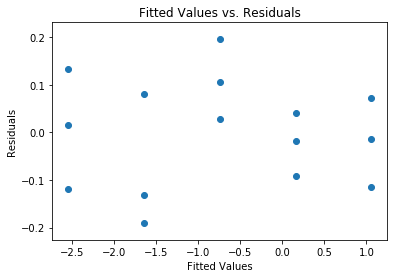

In [59]:
plt.scatter(lm_soln_t.fittedvalues, lm_soln_t.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted Values vs. Residuals")

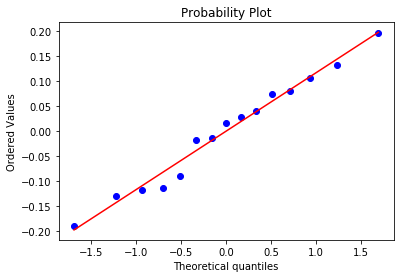

In [60]:
stats.probplot(lm_soln_t.resid, dist="norm", plot=pylab)
pylab.show()

*Interpretation:*

*Fitted vs. Residual Plot:* The residuals are equally spread and don't have a pattern. Thus, we can say that, the error term has a constant variance.

*Normal Probability Plot:* The plot seems to be non-linear, which means that the error is not in agreement with the normality. 


**(g)**

The regression function with transformed data (in original units): $\log{Y} = 1.50792 - 0.44993*X$

**Solution 3:**

**(a)**

In [61]:
crime_data = pd.read_csv("data/Crime Rate.csv")
lm_crime = ols("Y~X", data=crime_data).fit()
lm_crime.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.160     
Dependent Variable: Y                AIC:                1544.8513 
Date:               2019-10-15 13:21 BIC:                1549.7130 
No. Observations:   84               Log-Likelihood:     -770.43   
Df Model:           1                F-statistic:        16.83     
Df Residuals:       82               Prob (F-statistic): 9.57e-05  
R-squared:          0.170            Scale:              5.5521e+06
-------------------------------------------------------------------
            Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
Intercept 20517.5999 3277.6427  6.2599 0.0000 13997.3245 27037.8754
X          -170.5752   41.5743 -4.1029 0.0001  -253.2798   -87.8706
-------------------------------------------------------------------
Omnibus:                2.224        Durbin-Watson:           1.495
Prob(Omnibus):          0.329        Jarque-Bera (JB):        2.229
Skew:                   0.360        Prob(JB):                0.328
Kurtosis:               2.655        Condition No.:           1005 
===================================================================
* The condition number is large (1e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Fitted Values vs. Residuals')

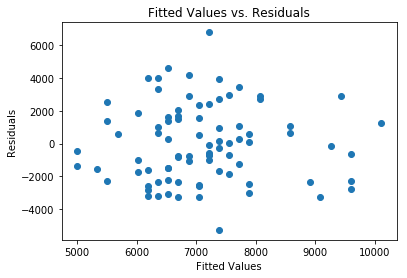

In [62]:
plt.scatter(lm_crime.fittedvalues, lm_crime.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted Values vs. Residuals")

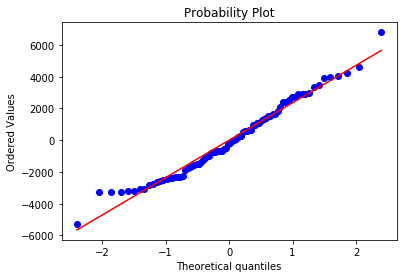

In [64]:
stats.probplot(lm_crime.resid, dist="norm", plot=pylab)
pylab.show()

*Interpretation:*

*Fitted vs. Residual Plot:* The residuals are not equally spread and have some pattern. Thus, we can say that, the error term does not have constant variance.

*Normal Probability Plot:* The plot seems to be s-shaped with heavy tails, which means that the error is not in agreement with normality. 

**(b)**

*Brown-Forsythe Test*

Null Hypothesis: $H_{0}$: Error variance is constant

Alternate Hypothesis: $H_{1}$: Error variance is not constant

In [65]:
crime_data["X"].describe()

count    84.000000
mean     78.595238
std       6.221066
min      61.000000
25%      76.000000
50%      79.000000
75%      82.250000
max      91.000000
Name: X, dtype: float64

In [77]:
ei = lm_crime.resid
df = pd.DataFrame((crime_data["Y"],crime_data["X"],ei), index=["Y", "X", "ei"])
df = df.T
df1 = df[df["X"]<=69]
df2 = df[df["X"]>69]

med1 = np.median(df1["ei"])
med2 = np.median(df2["ei"])

#n1
n1 = df1.shape[0]
print(n1)

#n2
n2 = df2.shape[0]
print(n2)

d1 = np.abs(df1["ei"]-med1)
d2 = np.abs(df2["ei"]-med2)

#calculate means for our answer 
mean_d1 = np.mean(d1)
print(mean_d1)
mean_d2 = np.mean(d2)
print(mean_d2)

s2 = (np.var(d1)*(n1-1)+np.var(d2)*(n2-1))/(n1+n2-2)
print(s2)

#calculate s
s = np.sqrt(s2)
print(s)

#testStastic = (mean.d1 - mean.d2) / (s * sqrt((1/n1)+1/n2)
testStastic = (mean_d1-mean_d2)/(s*np.sqrt((1/n1)+(1/n2)))  
print(testStastic)

t = stats.t.ppf(1-0.05, 118) 
print(t)

8
76
1751.8717099411474
1927.083052420138
1725198.8101052875
1313.4682371893457
-0.3588845719214978
1.6578695221021444


Decision Rule:

- If $|testStatistic| \leq t(1-\alpha/2,n-2)$, conclude $H_{0}$: constant error variance

- If $|testStatistic| > t(1-\alpha/2,n-2)$, conclude $H_{1}$: non-constant error variance 

Result:

Since $|-0.359| < 1.65787$ i.e. $|testStatistic| < t(1-\alpha/2,n-2)$, we conclude $H_{0}$. The error variance is constant and thus does not vary with X.

The conclusion supports the preliminary findings in part (a).

**Note:** The problem statement asks us to divide the dataset between X≤69 and X > 69, however, the mean of X is 79. As confirmed on piazza, we can use either 69 or 79 as medians.

**(c)**

*Breusch-Pagan Test*

Null Hypothesis: $H_{0}$: Error variance is constant

Alternate Hypothesis: $H_{1}$: Error variance is not constant

In [84]:
ei2 = ei**2
f = ols("ei2~X", data=df).fit()
f.summary2()

#to find SSE(R) and SSR(R)
display(anova_lm(f))

#to find SSE(F) and SSR(F)
display(anova_lm(lm_crime))

,df,sum_sq,mean_sq,F,PR(>F)
X,1.0,2.964003e+11,2.964003e+11,0.005951,0.938699
Residual,82.0,4.084315e+15,4.980872e+13,NaN,NaN


,df,sum_sq,mean_sq,F,PR(>F)
X,1.0,9.346294e+07,9.346294e+07,16.833765,0.000096
Residual,82.0,4.552732e+08,5.552112e+06,NaN,NaN


In [86]:
SSR_R = 2.9640e+11 
SSE_R = 4.0843e+15 

SSR_F = 93462942
SSE_F= 455273165

n = crime_data.shape[0]

#chi-squared: [SSR(R)/2] / [SSE(F)/n]^2  
chiTest = (SSR_R/2) / ((SSE_F/n))**2
print(chiTest)


#p 
chi = stats.chi2.ppf(1-0.05,1)
print(chi)


0.0050450174247412575
3.841458820694124


Decision Rule:

- If $chiTest \leq \chi^{2}(1-\alpha,1)$, conclude $H_{0}$: constant error variance

- If $chiTest > \chi^{2}(1-\alpha,1)$, conclude $H_{1}$: non-constant error variance 


Result:
Since $0.005045017 \leq 3.841459$ i.e. $chiTest \leq \chi^{2}(1-\alpha,1)$, we conclude $H_{0}$. The error variance is constant.

**This conclusion is inconsistent with the conclusions in part(a) and part(b) (using 69 as median).**

**Solution 4:**

**(a)**

In [88]:
plastic_data = pd.read_csv("data/Plastic Hardness.csv")
lm_plastic = ols("Y~X", data=plastic_data).fit()
lm_plastic.summary()

C:\Users\A0687514\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     506.5
Date:                Tue, 15 Oct 2019   Prob (F-statistic):           2.16e-12
Time:                        14:06:03   Log-Likelihood:                -40.414
No. Observations:                  16   AIC:                             84.83
Df Residuals:                      14   BIC:                             86.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    168.6000      2.657     63.454      0.000     162.901     174.299
X              2.0344      0.090     22.506      0.000       1.840       2.228
==============================================================================
Omnibus:                        0.955   Durbin-Watson:                   2.466
Prob(Omnibus):                  0.620   Jarque-Bera (JB):                0.711
Skew:                           0.068   Prob(JB):                        0.701
Kurtosis:                       1.976   Cond. No.                         96.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Regression Function: $Y = 168.6+2.03438*X$

Text(0.5, 1.0, 'Fitted Values vs. Residuals')

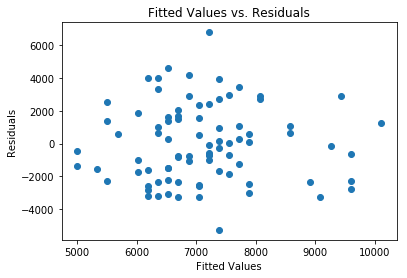

In [89]:
plt.scatter(lm_plastic.fittedvalues, lm_plastic.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted Values vs. Residuals")

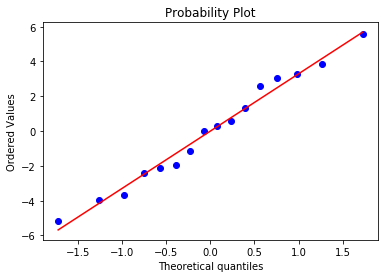

In [90]:
stats.probplot(lm_plastic.resid, dist="norm", plot=pylab)
pylab.show()

*Interpretation:*

*Fitted vs. Residual Plot:* The residuals are equally spread and don't have a pattern. Thus, we can say that, the error term has a constant variance.

*Normal Probability Plot:* The plot seems to be non-linear, which means that the error is not in agreement with the normality.


**(b)**

In [92]:
lm_plastic.conf_int()

,0,1
Intercept,162.90125,174.29875
X,1.84050,2.22825


*Interpretation:*

We can say with 90% family confidence coefficient that both of the above intervals for $\beta_{0}$ and $\beta_{1}$ are correct based on the given sample.

**(c)**

In [93]:
np.mean(plastic_data["X"])

28.0

Thus, $\bar{X} > 0$ which means that $\beta_{0}$ and $\beta_{1}$ are negatively correlated. This is to balance the effect of one coefficient, on the response, with the other coefficient. So, for example, if $\beta_{1}$ is too high, $\beta_{0}$ is likely to be too low to balance out the effect of $\beta_{1}$ on Y.

The joint confidence intervals in part (b) do support this view.

**(d)**

In [161]:
Xh = pd.DataFrame([20,30,40], columns=["X"])
alpha = 0.1
g = Xh.shape[0]

pred = lm_plastic.get_prediction(Xh)
pred_df = pred.summary_frame(alpha=alpha/g) # shortcut for Bonferroni
pred_df["Xh"] = Xh
pred_df

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,Xh
0,209.28750,1.084726,206.727743,211.847257,201.237933,217.337067,20
1,229.63125,0.828473,227.676203,231.586297,221.753092,237.509408,30
2,249.97500,1.352890,246.782422,253.167578,241.702411,258.247589,40


In [162]:
B = stats.t.ppf(1-alpha/(2*g), lm_plastic.df_resid)

pred_dict = dict()

pred_dict["Xh"] = np.array(Xh).reshape(3,)
pred_dict["fit"] = np.array(pred_df["mean"])
pred_dict["lower_B"] = np.array(pred_df["mean"]-B*pred_df["mean_se"])
pred_dict["upper_B"] = np.array(pred_df["mean"]+B*pred_df["mean_se"])

pd.DataFrame(pred_dict)

,Xh,fit,lower_B,upper_B
0,20,209.28750,206.727743,211.847257
1,30,229.63125,227.676203,231.586297
2,40,249.97500,246.782422,253.167578


*Interpretation:*

Family confidence coefficient means that the obtained confidence intervals, for several mean responses, are simultaneously accurate with a confidence coefficient of $1-\alpha$.

**(e)**

In [163]:
Xh = pd.DataFrame([30,40], columns=["X"])
alpha = 0.1
g = Xh.shape[0]

pred = lm_plastic.get_prediction(Xh)
pred_df = pred.summary_frame(alpha=alpha/g)
pred_df["Xh"] = Xh
pred_df

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,Xh
0,229.63125,0.828473,227.854353,231.408147,222.470972,236.791528,30
1,249.97500,1.352890,247.073339,252.876661,242.456233,257.493767,40


In [164]:
B = stats.t.ppf(1-alpha/(2*g), lm_plastic.df_resid)
S = np.sqrt( g * stats.f.ppf( 1 -alpha, g, lm_plastic.df_resid))
spred = np.sqrt(lm_plastic.mse_resid + pred_df["mean_se"]**2 ) # (2.38)

print(B)
print(S)

2.1447866879169273
2.335152440682177


*Interpretation:*

Thus, we can see that the most efficient procedure is the Bonferroni using t-distribution (compared to Scheffe using F-distribution) as it will yeild tighter linits (since $B<S$).

In [165]:
pred_dict = dict()

pred_dict["Xh"] = np.array(Xh).reshape(2,)
pred_dict["spred"] = spred
pred_dict["fit"] = np.array(pred_df["mean"])
pred_dict["lower_B"] = np.array(pred_df["mean"]-B*spred)
pred_dict["upper_B"] = np.array(pred_df["mean"]+B*spred)

pd.DataFrame(pred_dict)

,Xh,spred,fit,lower_B,upper_B
0,30,3.338457,229.63125,222.470972,236.791528
1,40,3.505601,249.97500,242.456233,257.493767


**Solution 5:**

In [166]:
mapper = {"Number of active physicians": "physicians", 
         "Total population": "population"}
cdi_data = pd.read_csv("data/CDI.csv").rename(columns=mapper)

In [167]:
lm_cdi = ols("physicians~population", data=cdi_data).fit()
lm_cdi.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.884     
Dependent Variable: physicians       AIC:                6894.6276 
Date:               2019-10-15 15:30 BIC:                6902.8012 
No. Observations:   440              Log-Likelihood:     -3445.3   
Df Model:           1                F-statistic:        3340.     
Df Residuals:       438              Prob (F-statistic): 4.66e-207 
R-squared:          0.884            Scale:              3.7220e+05
-------------------------------------------------------------------
                 Coef.   Std.Err.    t    P>|t|    [0.025   0.975] 
-------------------------------------------------------------------
Intercept      -110.6348  34.7460 -3.1841 0.0016 -178.9244 -42.3451
population        0.0028   0.0000 57.7932 0.0000    0.0027   0.0029
-------------------------------------------------------------------
Omnibus:             265.471       Durbin-Watson:          1.986   
Prob(Omnibus):       0.000         Jarque-Bera (JB):       2775.183
Skew:                2.437         Prob(JB):               0.000   
Kurtosis:            14.297        Condition No.:          858174  
===================================================================
* The condition number is large (9e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

**(a)**

In [168]:
lm_cdi.conf_int(alpha=0.05/2)

,0,1
Intercept,-188.783269,-32.486285
population,0.002687,0.002904


**(b)**

Both the values suggested by the investigator, $\beta_{1}=-100$ and $\beta_{0}=0.0028$, fall within the 95% joint confidence intervals obtained in part(a). Thus, the results in part(a) support the view of the investigator.

**(c)**

In [173]:
Xh = pd.DataFrame([500,1000,5000], columns=["population"])
alpha = 0.1
g = Xh.shape[0]

pred = lm_cdi.get_prediction(Xh)
pred_df = pred.summary_frame(alpha=alpha/g) # shortcut for Bonferroni
pred_df["Xh"] = Xh
pred_df

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,Xh
0,-109.237065,34.732797,-183.383982,-35.090148,-1413.743543,1195.269414,500
1,-107.839352,34.719583,-181.958061,-33.720644,-1412.344228,1196.665523,1000
2,-96.657653,34.614299,-170.551603,-22.763703,-1401.149777,1207.834472,5000


In [177]:
B = stats.t.ppf(1-alpha/(2*g), lm_cdi.df_resid)
W = np.sqrt(2*stats.f.ppf(1-alpha, 2, lm_cdi.df_resid))

print(B)
print(W)


2.1347810670190075
2.151619119897204


*Interpretation:*

Thus, we can see that the most efficient procedure is the Bonferroni using t-distribution (compared to Working-Hotelling using F-distribution) as it will yeild tighter limits (since $B<W$).

In [178]:
pred_dict = dict()

pred_dict["Xh"] = np.array(Xh).reshape(3,)
pred_dict["fit"] = np.array(pred_df["mean"])
pred_dict["lower_B"] = np.array(pred_df["mean"]-B*pred_df["mean_se"])
pred_dict["upper_B"] = np.array(pred_df["mean"]+B*pred_df["mean_se"])

pd.DataFrame(pred_dict)

,Xh,fit,lower_B,upper_B
0,500,-109.237065,-183.383982,-35.090148
1,1000,-107.839352,-181.958061,-33.720644
2,5000,-96.657653,-170.551603,-22.763703


*Interpretation:*

We can say with 90% family confidence coefficient that all of the above intervals are correct based on the given sample. However, we see that the predicted response (and the intervals) suggest negative values for Number of active physicians which is not practically possible. Thus, our model is not a good fit for our data for counties extremely low values of Total Population.

**Solution 6:**

**(a)**

In [189]:
mapper = {"Infection risk": "infection_risk", 
          "Available facilities and services": "facilities_services", 
          "Routine chest X-ray ratio": "chest_xray_ratio",
          "Length of stay": "LoS"}
senic_data = pd.read_csv("data/SENIC.csv").rename(columns=mapper)
senic_data.columns

Index(['LoS', 'Age', 'infection_risk', 'Routine culturing ratio',
       'chest_xray_ratio', 'Number of beds', 'Medical school affiliation',
       'Region', 'Average daily census', 'Number of nurses',
       'facilities_services'],
      dtype='object')

In [195]:
def reg_loop(df, x_cols, y_str):
    
    lm_regs = {}
    for i in range(len(x_cols)):
        x_str = x_cols[i]
        formula = y_str+"~"+x_str
        lm_regs[x_cols[i]] = ols(formula, data=df).fit()
        print("Linear Regression Summary: %s"%x_cols[i])
        print(lm_regs[x_cols[i]].summary2())
    return(lm_regs)

In [196]:
x_cols = ["infection_risk", "facilities_services", "chest_xray_ratio"]
y_str = "LoS"
lm_fits = reg_loop(df=senic_data, x_cols=x_cols, y_str=y_str)

Linear Regression Summary: infection_risk
                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.278   
Dependent Variable: LoS              AIC:                432.2539
Date:               2019-10-15 15:57 BIC:                437.7087
No. Observations:   113              Log-Likelihood:     -214.13 
Df Model:           1                F-statistic:        44.15   
Df Residuals:       111              Prob (F-statistic): 1.18e-09
R-squared:          0.285            Scale:              2.6375  
------------------------------------------------------------------
                 Coef.   Std.Err.     t     P>|t|   [0.025  0.975]
------------------------------------------------------------------
Intercept        6.3368    0.5213  12.1563  0.0000  5.3038  7.3697
infection_risk   0.7604    0.1144   6.6445  0.0000  0.5336  0.9872
-----------------------------------------------------------------
Omnibus:             62.988       Durbin-Watso

Three regression function are: 

- $Length.of.stay = 6.3368 + 0.7604*Infection.risk$
- $Length.of.stay = 7.71877 + 0.04471*Available.facilities.and.services$
- $Length.of.stay = 6.566373 + 0.037756*Routine.chest.X.ray.ratio$

**(b)**

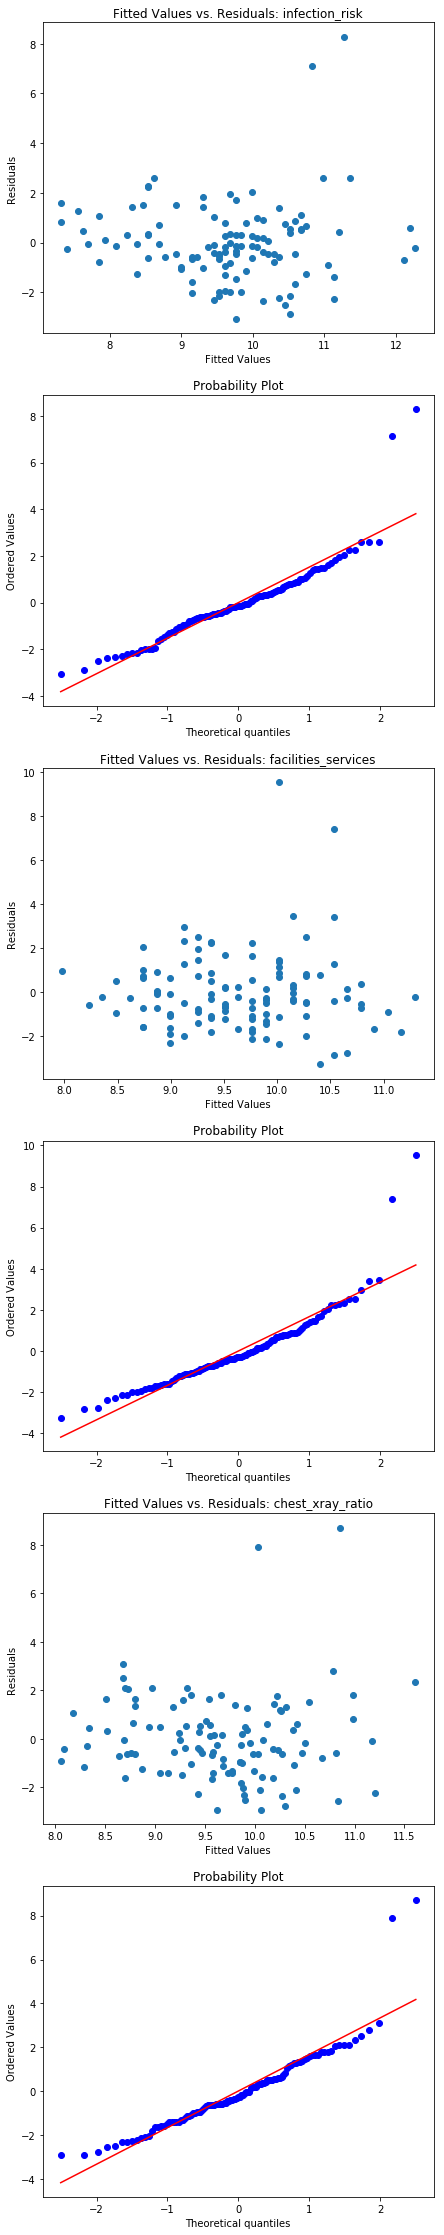

In [206]:
rse = [1.624, 1.795, 1.774]
fig, ax = plt.subplots(2*len(x_cols),1, figsize=(7,40))
for i in range(len(x_cols)):
    ax[i*2].scatter(lm_fits[x_cols[i]].fittedvalues, lm_fits[x_cols[i]].resid)
    ax[i*2].set_xlabel("Fitted Values")
    ax[i*2].set_ylabel("Residuals")
    ax[i*2].set_title("Fitted Values vs. Residuals: %s"%x_cols[i])

    stats.probplot(lm_fits[x_cols[i]].resid, dist="norm", plot=ax[i*2+1])
    

In [209]:
for i in range(len(x_cols)):
    ei = lm_fits[x_cols[i]].resid
    print(x_cols[i])
    print(ei[ei>6])

infection_risk
46     8.280478
111    7.116730
dtype: float64
facilities_services
46     9.543259
111    7.409120
dtype: float64
chest_xray_ratio
46     8.700788
111    7.907641
dtype: float64


*Interpretation:*

- For all three variables, we see that the residuals plotted against X and the normal probability plots show constant variance and conformity to normality, except for two outliers that have residuals $>6$. 
- As seen above, the outliers are the obervations: 47 and 112.


**(c)**

In [228]:
senic_data2 = senic_data.drop(labels=[46,111])
senic_data2.shape

(111, 11)

In [229]:
lm_senic = ols("LoS~infection_risk", data=senic_data2).fit()

In [230]:
Xh = pd.DataFrame([6.5,5.9], columns=["infection_risk"])
alpha = 0.05
g = Xh.shape[0]

pred = lm_senic.get_prediction(Xh)
pred_df = pred.summary_frame(alpha=alpha) # shortcut for Bonferroni
pred_df["Xh"] = Xh
pred_df

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,Xh
0,10.812587,0.226337,10.363994,11.261179,8.318631,13.306542,6.5
1,10.446738,0.182897,10.084242,10.809233,7.966822,12.926654,5.9


In [231]:
senic_data.iloc[[47,112],:]

,LoS,Age,infection_risk,Routine culturing ratio,chest_xray_ratio,Number of beds,Medical school affiliation,Region,Average daily census,Number of nurses,facilities_services
47,10.90,57.2,5.5,10.6,71.9,593,2,2,446,211,51.4
112,9.41,59.5,3.1,20.6,91.7,29,2,3,20,22,22.9


*Interpretation:*

The observation Y47 and Y112 fall outside the individual confidence intervals obtained above. This means that if our sample were to be without Y47 and Y112, the actual values of these observations would not fall within out-of-sample C.I. given by the estimated regresion function. Thus, these observations are deemed to be outliers.